In [5]:
import math
from numpy import argmin, around, asarray, clip
from numpy.random import rand, choice
from matplotlib import pyplot as plt, cm, pyplot
import numpy as np

In [6]:
def func(x, y):
    a = -20 * math.pow(math.exp(1), -0.2 * math.sqrt(0.5 * (x * x + y * y))) - math.pow(math.exp(1), 0.5 * (
            math.cos(2 * math.pi * x) + math.cos(2 * math.pi * y))) + math.exp(1) + 20
    return a

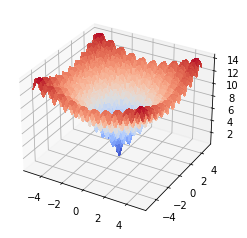

In [7]:
N = 100
xs, ys = np.linspace(-5, 5, N), np.linspace(-5, 5, N)
xv, yv = np.meshgrid(xs, ys)
zv = np.array([func(x, y) for x, y in np.vstack([xv.ravel(), yv.ravel()]).T]).reshape(N, N)
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

surf = ax.plot_surface(xv, yv, zv, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

In [8]:
def objects(x):
    return func(x[0], x[1])


def check_bounds(mutated, bounds):
    mutated_bound = [clip(mutated[i], bounds[i, 0], bounds[i, 1]) for i in range(len(bounds))]

    return mutated_bound


def cros(mutated, target, dims, cr):
    p = rand(dims)
    trial = [mutated[i] if p[i] < cr else target[i] for i in range(dims)]

    return trial


def mutation(x, F):
    return x[0] + F * (x[1] - x[2])


def differential(bounds, pop_size, iter, F, cr):
    steps = []
    pop = bounds[:, 0] + (rand(pop_size, len(bounds)) * (bounds[:, 1] - bounds[:, 0]))
    steps.append(pop.copy())

    obj_all = [objects(ind) for ind in pop]
    best_vector = pop[argmin(obj_all)]
    best_obj = min(obj_all)
    prev_obj = best_obj

    obj_iter = list()

    for i in range(iter):
        for j in range(pop_size):
            candidates = [candidate for candidate in range(pop_size) if candidate != j]
            a, b, c = pop[choice(candidates, 3, replace=False)]

            mutated = mutation([a, b, c], F)
            mutated = check_bounds(mutated, bounds)

            trial = cros(mutated, pop[j], len(bounds), cr)

            obj_target = objects(pop[j])
            obj_trial = objects(trial)
            if obj_trial < obj_target:
                pop[j] = trial
                obj_all[j] = obj_trial

            best_obj = min(obj_all)
            if best_obj < prev_obj:
                best_vector = pop[argmin(obj_all)]
                prev_obj = best_obj
        obj_iter.append(best_obj)

        print('Iteration: %d obj([%s]) = %.5f' % (i, around(best_vector, decimals=5), best_obj))
        steps.append(pop.copy())

    return [best_vector, best_obj, obj_iter, steps]


In [9]:
bounds = asarray([(-5.0, 5.0), (-5.0, 5.0)])
pop_size = 10
iter = 100
F = 0.5
cr = 0.7
solution = differential(bounds, pop_size, iter, F, cr)

Iteration: 0 obj([[-0.2066  -0.23606]]) = 2.39087
Iteration: 1 obj([[-0.2066  -0.23606]]) = 2.39087
Iteration: 2 obj([[-0.2066  -0.23606]]) = 2.39087
Iteration: 3 obj([[-0.2066  -0.23606]]) = 2.39087
Iteration: 4 obj([[-0.2066  -0.23606]]) = 2.39087
Iteration: 5 obj([[-0.2066  -0.23606]]) = 2.39087
Iteration: 6 obj([[-0.2066  -0.23606]]) = 2.39087
Iteration: 7 obj([[0.13883 0.04147]]) = 0.88800
Iteration: 8 obj([[-0.05869  0.03568]]) = 0.31589
Iteration: 9 obj([[-0.05869  0.03568]]) = 0.31589
Iteration: 10 obj([[-0.00249  0.00403]]) = 0.01401
Iteration: 11 obj([[-0.00249  0.00403]]) = 0.01401
Iteration: 12 obj([[-0.00249  0.00403]]) = 0.01401
Iteration: 13 obj([[-0.00249  0.00403]]) = 0.01401
Iteration: 14 obj([[-0.00249  0.00403]]) = 0.01401
Iteration: 15 obj([[-0.00249  0.00403]]) = 0.01401
Iteration: 16 obj([[-0.00249  0.00403]]) = 0.01401
Iteration: 17 obj([[-0.00249 -0.00357]]) = 0.01283
Iteration: 18 obj([[-0.00249 -0.00357]]) = 0.01283
Iteration: 19 obj([[-0.00249 -0.00357]]) = 


Оптимальное решение и минимум функции: obj([[-0. -0.]]) = 0.00000


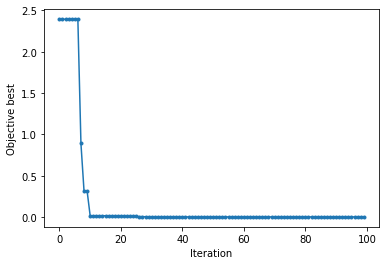

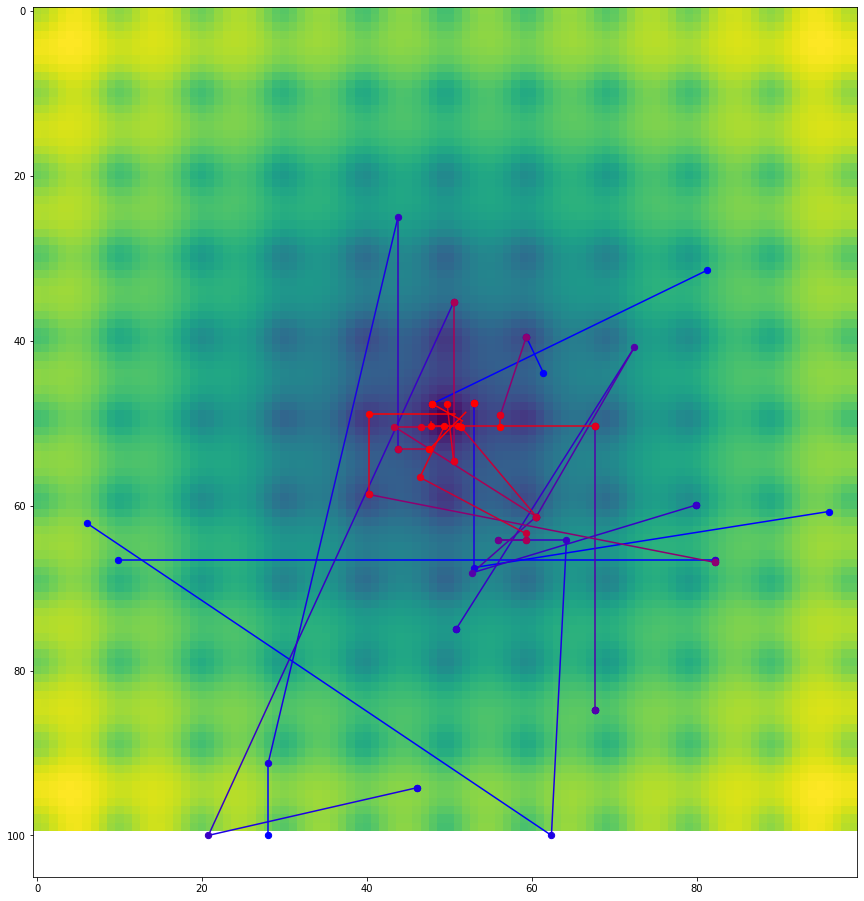

In [10]:
 print('\nОптимальное решение и минимум функции: obj([%s]) = %.5f' % (around(solution[0], decimals=5), solution[1]))

pyplot.plot(solution[2], '.-')
pyplot.xlabel('Iteration')
pyplot.ylabel('Objective best')
pyplot.show()

plt.figure(figsize=(16, 16))
plt.imshow(zv)
colors = np.linspace((0, 0, 1), (1, 0, 0), 10)

for i, c in enumerate(colors):
    pop = solution[-1][i] * 10 + 50
    next_pop = solution[-1][i + 1] * 10 + 50
    plt.scatter(pop[:, 0], pop[:, 1], color=c, s=40, edgecolors=c, zorder=10)
    plt.plot([pop.T[0], next_pop.T[0]], [pop.T[1], next_pop.T[1]], color=c)